# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Data

In [3]:
train = pd.read_csv(r'C:\Users\Sanjay\OneDrive\Desktop\crime\train.csv')

In [4]:
test = pd.read_csv(r'C:\Users\Sanjay\OneDrive\Desktop\crime\test.csv')

In [5]:
df = pd.DataFrame(train)

In [6]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [8]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [9]:
dftest = pd.DataFrame(test)

In [10]:
dftest.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [11]:
x = df['Category'].unique()

In [12]:
y = df['Category'].value_counts()

In [13]:
y

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

<BarContainer object of 39 artists>

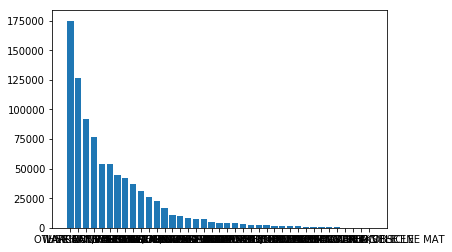

In [14]:
plt.bar(x,y)

In [15]:
df.drop(['Address'], axis=1, inplace=True)

In [16]:
pddistrict = pd.get_dummies(df.PdDistrict, prefix = 'pddistrict')
dayofweek = pd.get_dummies(df.DayOfWeek, prefix = 'dayofweek')

In [17]:
df.drop(['Descript', 'DayOfWeek', 'PdDistrict', 'Resolution'], axis=1 , inplace=True)

In [18]:
dffinal = df.join([pddistrict, dayofweek])

In [19]:
dffinal.shape

(878049, 21)

In [20]:
dffinal.head()

,Dates,Category,X,Y,pddistrict_BAYVIEW,pddistrict_CENTRAL,pddistrict_INGLESIDE,pddistrict_MISSION,pddistrict_NORTHERN,pddistrict_PARK,...,pddistrict_SOUTHERN,pddistrict_TARAVAL,pddistrict_TENDERLOIN,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,-122.425892,37.774599,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Clustering X and Y coordinates

In [21]:
Coordinates= dffinal[['X','Y']]

In [22]:
kmeans = KMeans(n_clusters = 60, init = 'k-means++')

In [23]:
dffinal['Clusters'] = kmeans.fit_predict(Coordinates[Coordinates.columns[0:1]])

In [24]:
dffinal.drop(['X','Y','Category','Dates'], axis=1, inplace=True)

In [25]:
dfyfinal = df['Category']

In [26]:
X1 = dffinal

In [27]:
Y1 = dfyfinal

In [28]:
Y1.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [29]:
rep = {'LARCENY/THEFT':1, 'OTHER OFFENSES':2,'NON-CRIMINAL':3,'ASSAULT':4,'VEHICLE THEFT':5,'VANDALISM':6,'WARRANTS':7,'BURGLARY':8,'SUSPICIOUS OCC':9,'DRUG/NARCOTIC':10,'MISSING PERSON':11,'ROBBERY':12,'FRAUD':13,'SECONDARY CODES':14,'WEAPON LAWS':15,'TRESPASS':16,'STOLEN PROPERTY':17,'SEX OFFENSES FORCIBLE':18,'FORGERY/COUNTERFEITING':19,'DRUNKENNESS':20,'KIDNAPPING':21,'DRIVING UNDER THE INFLUENCE':22,'DISORDERLY CONDUCT':23,'PROSTITUTION':24,'ARSON':25,'RUNAWAY':26,'LIQUOR LAWS':27,'EMBEZZLEMENT':28,'FAMILY OFFENSES':29,'BRIBERY':30,'SUICIDE':31,'LOITERING':32,'SEX OFFENSES NON FORCIBLE':33,'EXTORTION':34,'BAD CHECKS':35,'GAMBLING':36,'TREA':37}

In [30]:
Y1.replace(to_replace=rep)

0          7
1          2
2          2
3          1
4          1
5          1
6          5
7          5
8          1
9          1
10         1
11         2
12         6
13         1
14         3
15         3
16        12
17         4
18         2
19         3
20         1
21        12
22         7
23         3
24         1
25         3
26         1
27         1
28         1
29         2
          ..
878019     2
878020     2
878021     6
878022     5
878023     1
878024     2
878025     2
878026     7
878027     7
878028     4
878029     2
878030    18
878031     4
878032     2
878033     6
878034    16
878035     4
878036     1
878037     6
878038     7
878039     2
878040     4
878041     2
878042     4
878043     2
878044    12
878045     1
878046     1
878047     6
878048    19
Name: Category, Length: 878049, dtype: object

In [31]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1,100, num =3)]
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4,6,8,10]
bootstrap =  [True,False]

In [32]:
random_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [33]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=random_grid, n_iter = 75, cv=2, verbose=2, random_state=42, n_jobs = -1)

In [34]:
rf_random.fit(X1, Y1)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 108.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 715.7min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=75, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto'], 'max_depth': [1, 50, 100], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [36]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfinal = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
rfinal.fit(X1,Y1)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Prepare Test Dataset

In [39]:
dftest.drop(['Address'], axis=1, inplace=True)

In [40]:
dftest

,Id,Dates,DayOfWeek,PdDistrict,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,-122.413935,37.798886


In [41]:
pddistrict2=pd.get_dummies(dftest.PdDistrict, prefix = 'pddistrict2')
dayofweek2 = pd.get_dummies(dftest.DayOfWeek, prefix = 'dayofweek2')

In [42]:
dftest.drop(['PdDistrict','DayOfWeek'], axis=1, inplace=True)

In [43]:
dftestfin2 = dftest.join([pddistrict2, dayofweek2])

In [44]:
dftestfin2

,Id,Dates,X,Y,pddistrict2_BAYVIEW,pddistrict2_CENTRAL,pddistrict2_INGLESIDE,pddistrict2_MISSION,pddistrict2_NORTHERN,pddistrict2_PARK,...,pddistrict2_SOUTHERN,pddistrict2_TARAVAL,pddistrict2_TENDERLOIN,dayofweek2_Friday,dayofweek2_Monday,dayofweek2_Saturday,dayofweek2_Sunday,dayofweek2_Thursday,dayofweek2_Tuesday,dayofweek2_Wednesday
0,0,2015-05-10 23:59:00,-122.399588,37.735051,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,-122.391523,37.732432,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2015-05-10 23:50:00,-122.426002,37.792212,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,2015-05-10 23:45:00,-122.437394,37.721412,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,2015-05-10 23:45:00,-122.437394,37.721412,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,5,2015-05-10 23:40:00,-122.459024,37.713172,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,6,2015-05-10 23:30:00,-122.425616,37.739351,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,7,2015-05-10 23:30:00,-122.412652,37.739750,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,8,2015-05-10 23:10:00,-122.418700,37.765165,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,9,2015-05-10 23:10:00,-122.413935,37.798886,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
Coordinates2 = dftestfin2[['X','Y']]

In [46]:
kmeans = KMeans(n_clusters = 60, init = 'k-means++')

In [47]:
dftestfin2['Clusters'] = kmeans.fit_predict(Coordinates2[Coordinates2.columns[0:1]])

In [48]:
dftestfin2.drop(['X', 'Y', 'Dates'], axis=1, inplace=True)

In [54]:
dftestfin2.drop(['Id'], axis=1, inplace=True)

In [49]:
dftestfin2

,Id,pddistrict2_BAYVIEW,pddistrict2_CENTRAL,pddistrict2_INGLESIDE,pddistrict2_MISSION,pddistrict2_NORTHERN,pddistrict2_PARK,pddistrict2_RICHMOND,pddistrict2_SOUTHERN,pddistrict2_TARAVAL,pddistrict2_TENDERLOIN,dayofweek2_Friday,dayofweek2_Monday,dayofweek2_Saturday,dayofweek2_Sunday,dayofweek2_Thursday,dayofweek2_Tuesday,dayofweek2_Wednesday,Clusters
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,16
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36
4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,36
5,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5
6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,56
7,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,33
8,8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,21
9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47


In [55]:
y_pred = rfinal.predict(dftestfin2)

In [57]:
submission = pd.DataFrame({'Id' : dftest['Id'], 'Category':y_pred})

In [60]:
submission

,Id,Category
0,0,SUSPICIOUS OCC
1,1,VEHICLE THEFT
2,2,LARCENY/THEFT
3,3,OTHER OFFENSES
4,4,OTHER OFFENSES
5,5,LARCENY/THEFT
6,6,LARCENY/THEFT
7,7,LARCENY/THEFT
8,8,LARCENY/THEFT
9,9,LARCENY/THEFT


In [84]:
filename = "CrimePrediction1final.csv"

In [85]:
finaldf2.to_csv(filename, index=False)

Accuracy per Kaggle.com : 68.232% 